# Entanglement detection

In [2]:
## import necessary packages
import sys
import numpy as np
import matplotlib as mpl
import math
from cmath import cos, sin, exp, pi
# import cmath

# mpl.rcParams['figure.dpi'] = 400
# mpl.rcParams["figure.figsize"] = [10, 6]
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# print(sys.version)
# print(sys.executable)
# print(np.__version__)
# print(mpl.__version__)

from qutip import *

import random
pauli_operators = [qeye(2), sigmax(),sigmay(),sigmaz()]
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()

from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay



## Shadow tomography

### full tomography

In [20]:
# Quantum Process Tomography

# qpt(U, op_basis_list)
# qpt_plot(chi, lbls_list, title=None, fig=None, axes=None)

### shadow tomography

### classical shadow

### derandomized tomography

## quantum circuits

### qunatum trace estimation 

#### entanglement spectrum

In [ ]:
# cnot(N=None, control=0, target=1)
# controlled_gate(U, N=2, control=0, target=1, control_value=1)
# csign(N=None, control=0, target=1)
# hadamard_transform(N=1)
# phasegate(theta, N=None, target=0)
# sqrtswap(N=None, targets=[0, 1])
# swap(N=None, targets=[0, 1])
# toffoli(N=None, controls=[0, 1], target=2)

# qft(N=1)

### Generate GHZ states

/Users/jue/opt/anaconda3/lib/python3.8/site-packages/qutip_qip/operations/gates.py:463: UserWarning: Unknown gate cH
  warnings.warn("Unknown gate %s" % name)


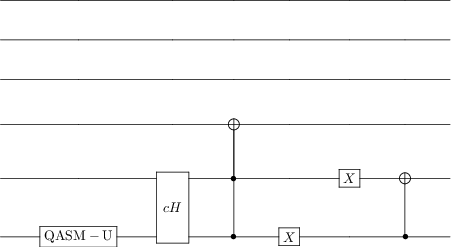

In [21]:
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import (Gate, controlled_gate, hadamard_transform)

def controlled_hadamard():
    # Controlled Hadamard
    return controlled_gate(hadamard_transform(1),
                           2,
                           control=0,
                           target=1,
                           control_value=1)

qc = QubitCircuit(N=3, num_cbits=3)
qc.user_gates = {"cH": controlled_hadamard}
qc.add_gate("QASMU", targets=[0], arg_value=[1.91063, 0, 0])
qc.add_gate("cH", targets=[0, 1])
qc.add_gate("TOFFOLI", targets=[2], controls=[0, 1])
qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[1])
qc.add_gate("CNOT", targets=[1], controls=0)
qc.png


In [30]:
# from qutip import tensor, basis

zero_state = tensor(basis(2, 0), basis(2, 0), basis(2, 0))
result = qc.run(state=zero_state)
wstate = result

print(wstate)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.57734961]
 [0.57734961]
 [0.        ]
 [0.57735159]
 [0.        ]
 [0.        ]
 [0.        ]]


## Entanglement witness

### machine learning ansatz

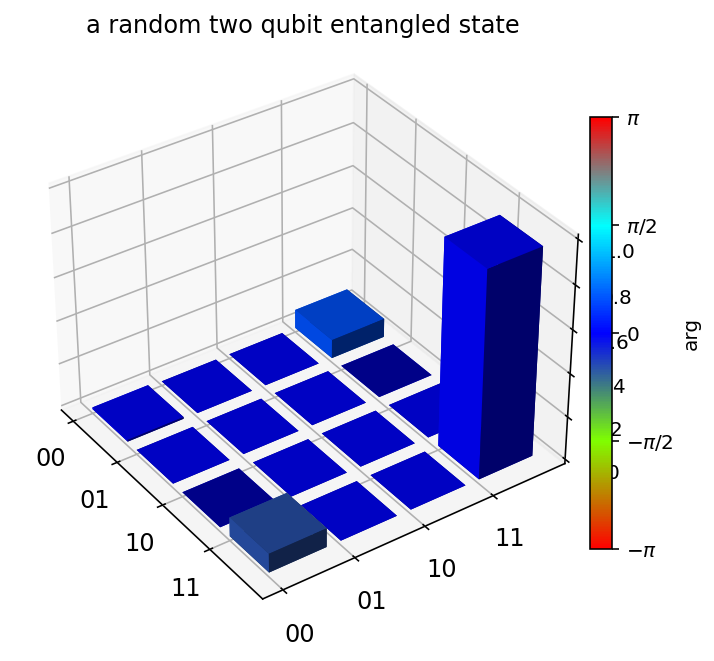

In [37]:
size_train = 100
size_test = 10
def generate_two_qubit_entangled_pure_state(m):
	# permute(order)
	theta_list = [ random.random()*2*pi for i in range(m) ]
	phi_list = [ random.random()*pi for i in range(m) ]

	a_list = [ cos(theta) for theta in theta_list ]
	b_list = [ sin(theta) * exp(phi*1j) for theta in theta_list for phi in phi_list ]
	# x = a* basis(4, 0) + b* basis(4, 3)
	# print(x.norm())
	# print(x)
	matrix_histogram_complex( ket2dm(random.choice(a_list) * tensor(basis(2, 0),basis(2, 0)) + random.choice(b_list) * tensor(basis(2, 1),basis(2, 1)) ), 
	# xlabels=None, ylabels=None, 
	xlabels=['00', '01', '10', '11'],
	ylabels=['00', '01', '10', '11'],
	title="a random two qubit entangled state", 
	limits=None, phase_limits=None, 
	colorbar=True, fig=None, ax=None, threshold=None)
	# matrix_histogram(
	# ket2dm( random.choice(a_list) * basis(4, 0) + random.choice(b_list) * basis(4, 3)) ,
	# xlabels=['00', '01', '10', '11'],
	# ylabels=['00', '01', '10', '11'],
	# #  ylabels=None,
	# title="a random pure product state in density matrix",
	# limits=None,
	# colorbar=True,
	# # fig=fig,
	# # ax=axes[1],
	# fig=None,
	# ax=None,
	# options=None)

	return [ket2dm( a* tensor(basis(2, 0),basis(2, 0)) + b* tensor(basis(2, 1),basis(2, 1)) ) for a in a_list for b in b_list ]

two_qubit_entangled_pure_state = generate_two_qubit_entangled_pure_state(size_test)
# print(len(two_qubit_entangled_pure_state))
# print(two_qubit_entangled_pure_state[0])
# print(two_qubit_entangled_pure_state[0].isket)

============== summary ===============
size of training set: 5000 ; size of testing set: 100
kernel method: rbf
accuracy of prediction 0 (bell entangled): 1.0
accuracy of prediction 1 (separable): 1.0
accuracy of prediction (other entangled): 0.602
============== end ===============


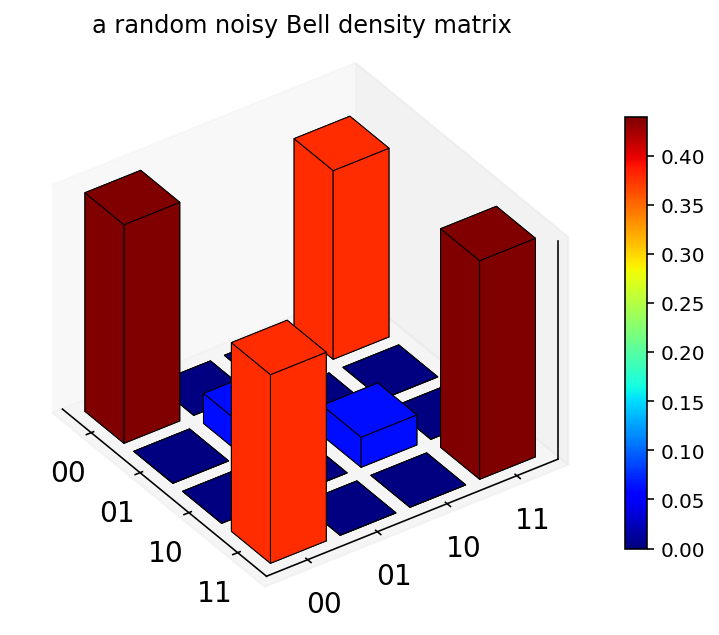

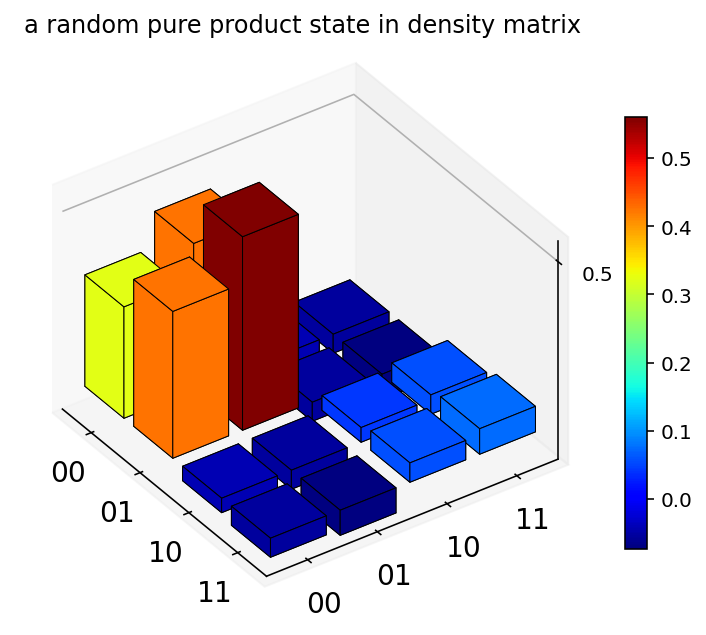

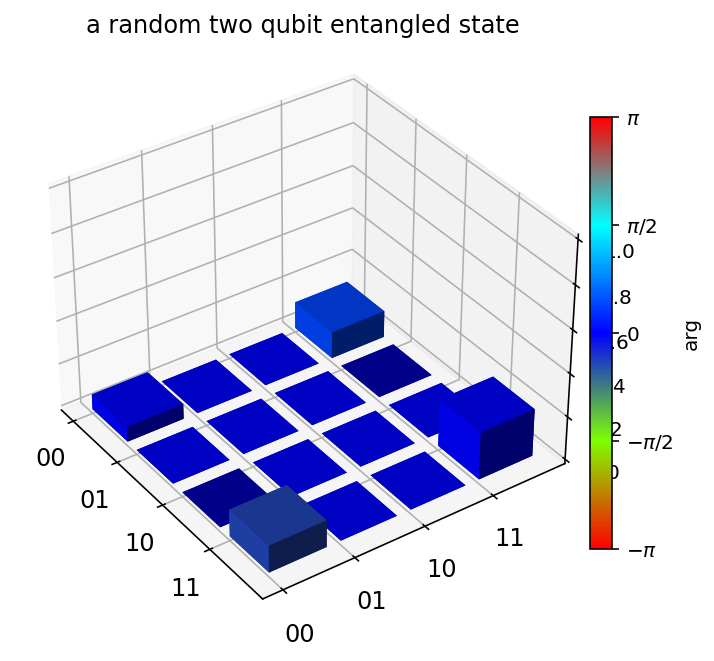

In [41]:
# rand_herm
# rand_unitary
# rand_unitary_haar
# rand_dm(N=3)


# number_samples = 1000
size_train = 1000

bell_kinds = ['00', '01', '10', '11']
two_pauli = [tensor([a,b]) for a in pauli_operators for b in pauli_operators ]
# print(two_pauli)


def generate_two_qubit_product_pure_state(m):
    return [ tensor([rand_ket(N=2),rand_ket(N=2)]) for i in range(m)]


def generate_bell_noisy_density(m,kind):
    # p_limit = 1/3
    random_white_noise_p = [random.random()/3 for i in range(m)]

    # density_matrix_bell00 = ket2dm( bell_state(state=k) )
    # print(density_matrix_bell00)

    # noisy_density = density_matrix_bell00* (1 - p) +  p /4 * identity([2,2])
    # print(noisy_density)
    return [
        ket2dm( bell_state(state=kind) ) * (1 - p) +  p /4 * identity([2, 2])
        for p in random_white_noise_p
    ]

# generate_rand_pure_state_ensemble(4,5)
def assemble_training_dataset(m):

    # figure = plt.figure(figsize=(10, 6))
    # fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
    # fig, axes = plt.subplots(1, 2, figsize=(12,3))
    # bell_noisy_density = np.array([ generate_bell_noisy_density(m, kind) for kind in bell_kinds ]).flatten()
    # print(len(bell_noisy_density))
    # print(bell_noisy_density[3])
    bell00_noisy_density = generate_bell_noisy_density(m,'00')
    # print(bell00_noisy_density[0])
    bell01_noisy_density = generate_bell_noisy_density(m,'01')
    bell10_noisy_density = generate_bell_noisy_density(m,'10')
    bell11_noisy_density = generate_bell_noisy_density(m,'11')

    # generate_two_qubit_product_pure_state(m)
    # feature_bell = [ expect(two_pauli, state) for state in flatten(bell_noisy_density) ]
    # print(feature_bell)
    feature_bell00 = [
        expect(two_pauli, state) for state in bell00_noisy_density
    ]
    feature_bell01 = [
        expect(two_pauli, state) for state in bell01_noisy_density
    ]
    feature_bell10 = [
        expect(two_pauli, state) for state in bell10_noisy_density
    ]
    feature_bell11 = [
        expect(two_pauli, state) for state in bell11_noisy_density
    ]

    # ax = plt.subplot(1,2,1)
    # visualize a random noisy Bell state in density matrix
    matrix_histogram(
        random.choice(bell00_noisy_density),
        xlabels=['00', '01', '10', '11'],
        ylabels=['00', '01', '10', '11'],
        #  ylabels=None,
        title="a random noisy Bell density matrix",
        limits=None,
        colorbar=True,
        fig=None,
        ax=None,
        #  fig=fig,
        #  ax=axes[0],
        options=None)

    separable_pure_state = generate_two_qubit_product_pure_state(m)
    feature_separable = [
     expect(two_pauli, state)
     for state in separable_pure_state
    ]
    # visualize a random pure product state in density matrix
    matrix_histogram(
        ket2dm(random.choice(separable_pure_state)),
        xlabels=['00', '01', '10', '11'],
        ylabels=['00', '01', '10', '11'],
        #  ylabels=None,
        title="a random pure product state in density matrix",
        limits=None,
        colorbar=True,
        # fig=fig,
        # ax=axes[1],
        fig=None,
        ax=None,
        options=None)

    # combine 0 data with 1 data
    feature = feature_bell00 + feature_bell01 + feature_bell10 + feature_bell11 + feature_separable

    label = [0 for i in range(m)] + [0 for i in range(m)]+ [0 for i in range(m)]+ [0 for i in range(m)] + [1 for i in range(m)]
    return (feature, label)

def my_svm(x, y, size_train, size_test, kernel):
    ################# SVM training ####################
    print("============== summary ===============")
    print("size of training set:", len(x), "; size of testing set:", size_test)
    # print("size of testing set:", size_test)

    # we create an instance of SVM and fit out data.
    if kernel == 'linear':
        # linear kernel
        print("kernel method: linear kernel")
        clf = svm.SVC(kernel='linear')
        # clf = svm.SVC(kernel=my_kernel)
        # # clf.get_params()
        clf.fit(X, Y)
        print(clf.coef0)
        print(clf.coef_)
        print(clf.intercept_)
    else:
        # kernel
        print("kernel method: rbf")
        clf = svm.SVC()
        clf.fit(X, Y)

    ################# test/prediction ####################
    prediction_0 = clf.predict([expect(two_pauli, state)
      for state in generate_bell_noisy_density(size_test,'00') + generate_bell_noisy_density(size_test,'01') + generate_bell_noisy_density(size_test,'10') + generate_bell_noisy_density(size_test,'11')
     ])
    prediction_1 = clf.predict([expect(two_pauli, state)
      for state in generate_two_qubit_product_pure_state(size_test)
     ])
    # print(prediction)
    print("accuracy of prediction 0 (bell entangled):", sum((1-prediction_0))/len(prediction_0))
    print("accuracy of prediction 1 (separable):", sum(prediction_1)/len(prediction_1))

    prediction_2 = clf.predict([
        expect(two_pauli, state) for state in generate_two_qubit_entangled_pure_state(10)
    ])
    # print(prediction_2)
    print("accuracy of prediction (other entangled):", sum(prediction_2)/len(prediction_2))
    print("============== end ===============")


(X, Y) = assemble_training_dataset(size_train)
my_svm(X, Y, 1000, 100, '')

### Bell, CHSH inequalities as entanglement witness

the Bell inequality
$$ \langle a_0b_0, a_0b_0', a_0'b_0, a_0'b_0' \rangle$$
with $a_0=\sigma_x$, $a_0'=\sigma_x$, $b_0=(\sigma_x-\sigma_z)/\sqrt{2}$, and $b_0'=(\sigma_x+\sigma_z)/\sqrt{2}$

the CHSH inequality
$$ \langle \rangle$$


In [ ]:
# expect(oper, state)
variance(oper, state)
# purity()

entropy_relative(rho, sigma, base=2.718281828459045, sparse=False, tol=1e-12)
entropy_vn(rho, base=2.718281828459045, sparse=False)
tracedist(A, B, sparse=False, tol=0)

measure(state, ops, targets=None)
measure_observable(state, op, targets=None)

# covariance_matrix(basis, rho, symmetrized=True)
# logarithmic_negativity(V, g=1.4142135623730951)

#### Two-qubit case

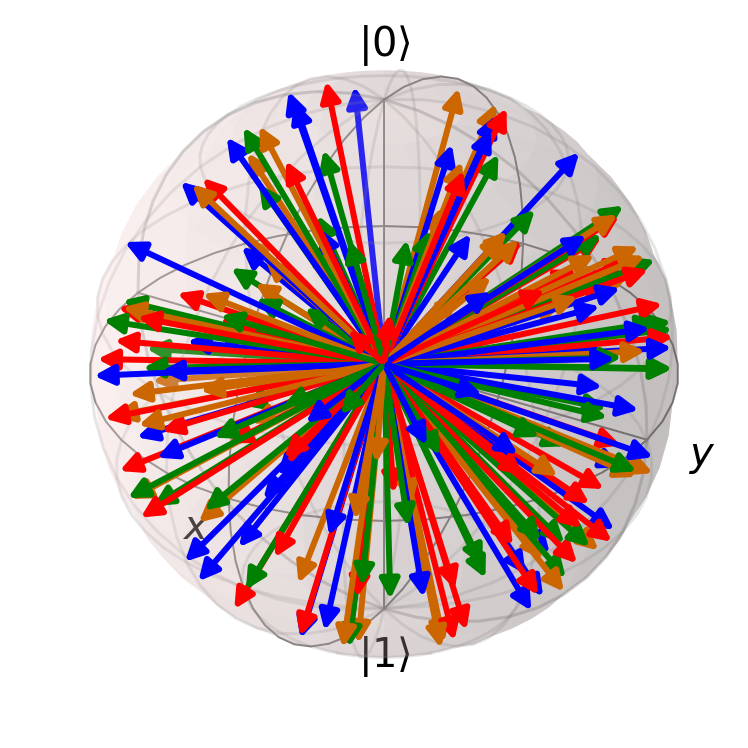

In [152]:
# bell state

b = Bloch()
# pnt = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]
# b.add_points(pnt)
b.add_states([rand_ket(2) for i in range(200)])
b.render()
b.show()
# bell_state(state='00')

##### Necessary and sufficient condition: Positive Partial Transpose (PPT) 

$$|\psi \rangle $$

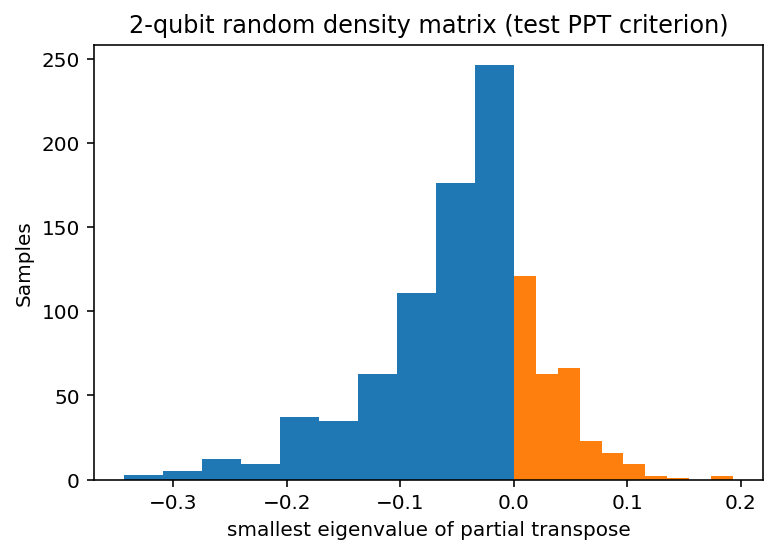

In [143]:
def ppt_criterion(rho):
    # rho = ket2dm(bell_state())
    rho_out = partial_transpose(rho, [0, 1])
    # print(rho_out.eigenenergies(sort='low',eigvals=1))
    return rho_out.eigenenergies(sort='low', eigvals=1)

# for state in generate_two_qubit_entangled_pure_state(3):
#     eigen_val = ppt_criterion(state)
#     eigen_val
# print(rand_dm(N=4,dims=[[2,2],[2,2]]) )

fig, ax = plt.subplots(figsize=(6, 4))

smallest_eigen_list_random = np.array([
    ppt_criterion(state)
    for state in [rand_dm(N=4,dims=[[2,2],[2,2]]) for i in range(1000)]
]).flatten()

# print(np.array(smallest_eigen_list_entangled).flatten())
# ax.hist(smallest_eigen_list_random)
ax.hist([ e for e in smallest_eigen_list_random if e < 0 ])
ax.hist([ e for e in smallest_eigen_list_random if e >= 0 ])
# ax.text(4, 0.4, r'$$')
ax.set_ylabel('Samples')
# ax.set_ylabel(r'$ \tr (W \rho ) $')
ax.set_xlabel('smallest eigenvalue of partial transpose')
ax.set_title('2-qubit random density matrix (test PPT criterion)')
# ax.legend(('fully separable', 'GHZ3', 'projection witness', 'Bell inequality',
#            'stabilizer', 'ML ansatz'),
#           loc='upper right')

# plt.savefig('two_qubit_PPT_hist.png', dpi=300)

(array([1000.]),
 array([-5.06214077e-16,  5.44443795e-17]),
 <BarContainer object of 1 artists>)

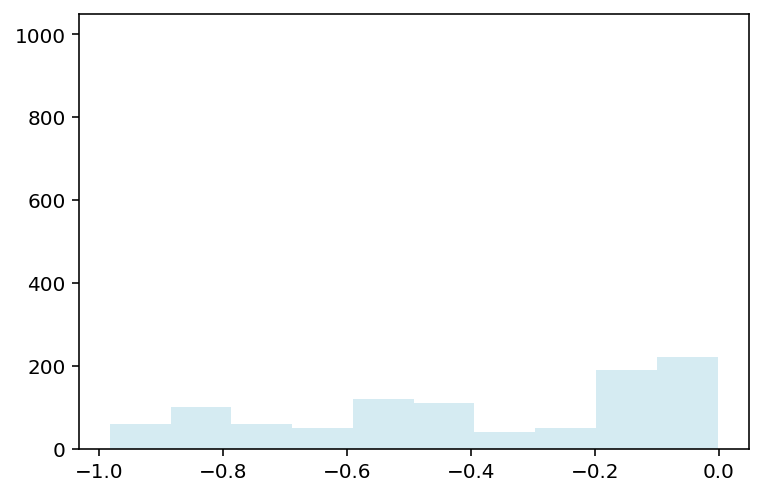

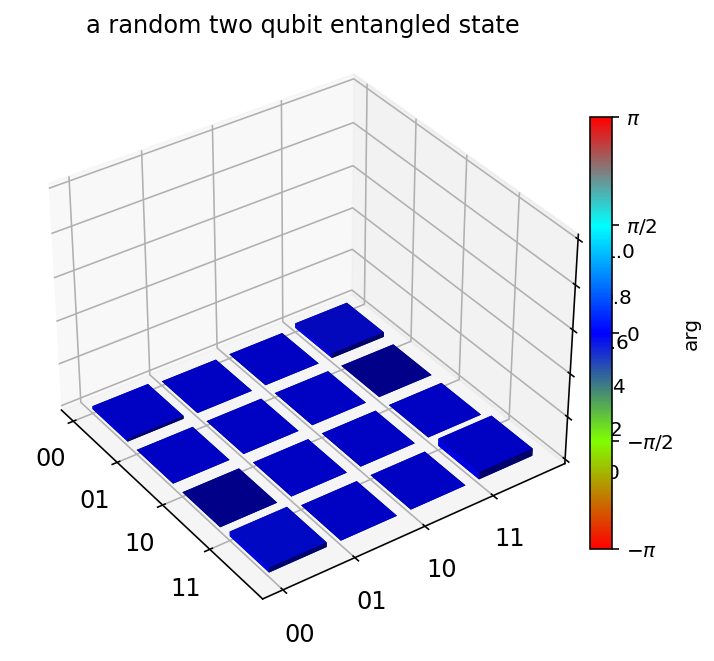

In [101]:
# dag(A)
# ptrace()
# flatten(l)
# partial_transpose(rho, mask, method='dense')

def generate_rand_mixed_state_ensemble(d, m):
    return [rand_dm(N=d) for i in range(m)]

def generate_rand_entangled_ensemble(d, m):
    return [rand_dm(N=d) for i in range(m)]

# for state in generate_two_qubit_entangled_pure_state(3):
#     eigen_val = ppt_criterion(state)
#     eigen_val

fig, ax = plt.subplots(figsize=(6, 4))

smallest_eigen_list_entangled = [
    ppt_criterion(state) for state in generate_two_qubit_entangled_pure_state(10)
]
# print(np.array(smallest_eigen_list_entangled).flatten())
ax.hist(np.array(smallest_eigen_list_entangled).flatten(), color='lightblue', alpha=0.5)

smallest_eigen_list_product = [
    ppt_criterion(ket2dm(state)) for state in generate_two_qubit_product_pure_state(1000)
]
# ax.plot(np.array(smallest_eigen_list_product).flatten())
ax.hist(np.array(smallest_eigen_list_product).flatten(), bins=1, color='salmon', alpha=0.5)

# for state in generate_two_qubit_product_pure_state(27):
#     # print(ket2dm(state))
#     ppt_criterion(ket2dm(state))


# matrix_histogram(M, xlabels=None, ylabels=None, title=None, limits=None, colorbar=True, fig=None, ax=None)


##### Two-qutrit

##### Two-qudit


In [345]:
# qutrit_basis()
x = basis(3, 2)
M = ket2dm(x)
print(M)


#### Three-qubit case
fully separable

biseparable

GME

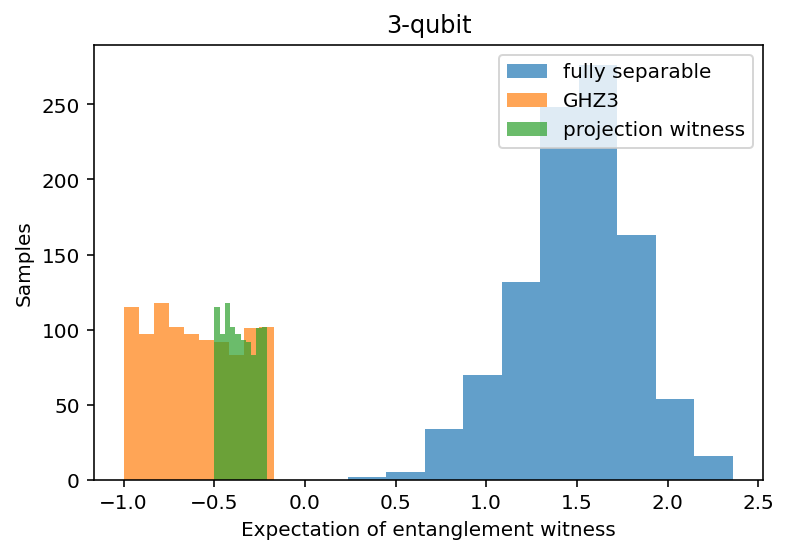

In [111]:
size_train = 1000

# rand_ket
def generate_rand_3_qubit_pure_product_state(d, m):
    return [ ket2dm(tensor(rand_ket(2),rand_ket(2),rand_ket(2))) for i in range(m) ]

# GHZ
# random_white_noise_p = [random.random()/3 for i in range(size_train)]
ghz_3_density = [ ket2dm(ghz_state(N=3)) * (1 - p) +  p /(2**3) * qeye([2, 2, 2]) for p in [random.random()/3 for i in range(size_train)] ]
# ghz_3_density

# matrix_histogram(
#     random.choice(ghz_3_density),
#     # xlabels=['00', '01', '10', '11'],
#     # ylabels=['00', '01', '10', '11'],
#     #  ylabels=None,
#     # title="a random pure product state in density matrix",
#     limits=None,
#     colorbar=True,
#     # fig=fig,
#     # ax=axes[1],
#     fig=None,
#     ax=None,
#     options=None)
fig, ax = plt.subplots(figsize=(6, 4))

# rigorous entanglement witness
witness_ghz_3 =  3/2 * qeye([2, 2, 2]) - tensor([sigmax(), sigmax(), sigmax()]) - 1/2 * (tensor([sigmaz(), sigmaz(), qeye([2])]) + tensor([qeye([2]), sigmaz(), sigmaz()]) + tensor([sigmaz(), qeye([2]), sigmaz()]))

expect_fully_separable_3 = [
    expect(witness_ghz_3, state) for state in generate_rand_3_qubit_pure_product_state(3,size_train)
]
ax.hist(expect_fully_separable_3, alpha=0.7)
# ax.plot(expect_fully_separable_3)

expect_witness_ghz_3 = [
 expect(witness_ghz_3, state) for state in ghz_3_density
]
ax.hist(expect_witness_ghz_3, alpha=0.7)
# ax.plot(expect_witness_ghz_3)

witness_ghz_3_project = 1/2 * qeye([2, 2, 2]) - ket2dm(ghz_state(N=3))
# print(witness_ghz_3_project)
expect_witness_ghz_3_project = [
 expect(witness_ghz_3_project, state) for state in ghz_3_density
]
# print(expect_witness_ghz_3_project)
ax.hist(expect_witness_ghz_3_project, alpha=0.7)
# ax.plot(expect_witness_ghz_3_project)

# ax.text(4, 0.4, r'$$')
ax.set_ylabel('Samples')
# ax.set_ylabel(r'$ \tr (W \rho ) $')
ax.set_xlabel('Expectation of entanglement witness')
ax.set_title('3-qubit')
ax.legend(('fully separable', 'GHZ3', 'projection witness', 'Bell inequality', 'stabilizer', 'ML ansatz'), loc='upper right')
# fig.show()
# plt.savefig('three_qubit_hist.png', dpi=300)

# ansatz
three_pauli = [tensor([a,b,c]) for a in pauli_operators for b in pauli_operators for c in pauli_operators]


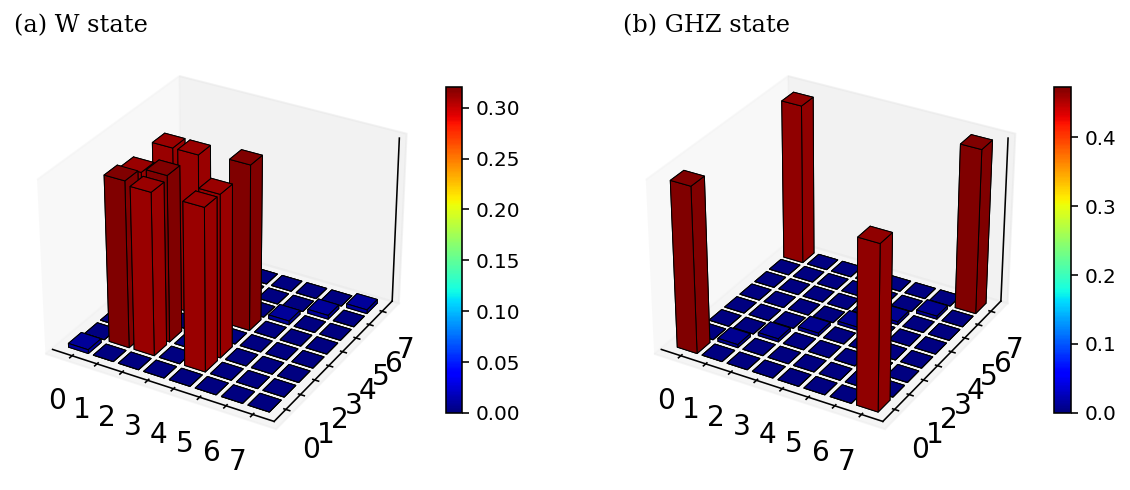

In [3]:
size_train = 10
# W
w_3_density = [ ket2dm(w_state(N=3)) * (1 - p_noise) +  p_noise / (2**3) * qeye([2, 2, 2]) for p_noise in [random.random()/3 for i in range(size_train)] ]

ghz_3_density = [
    ket2dm(ghz_state(N=3)) * (1 - p_noisep) + p_noisep /
    (2**3) * qeye([2, 2, 2])
    for p_noisep in [random.random() / 3 for i in range(size_train)]
]

# visualization
# figure = plt.figure(figsize=(10, 6))
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
# fig, ax = plt.subplots(figsize=(6, 4))
# fig, axes = plt.subplots(1, 2, figsize=(12,3))
# =============
# First subplot
# =============
# fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(10, 4))
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('(a) W state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(
    random.choice(w_3_density),
    # xlabels=['000', '001', '010', '011', '100', '101', '110', '111'],
    # ylabels=['00', '01', '10', '11'],
    #  ylabels=None,
    # title="a random pure product state in density matrix",
    limits=None,
    # colorbar=False,
    fig=fig,
    ax=ax,
    # fig=None,
    # ax=None,
    options=None)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('(b) GHZ state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(
    random.choice(ghz_3_density),
    # xlabels=['000', '001', '010', '011', '100', '101', '110', '111'],
    # ylabels=['00', '01', '10', '11'],
    #  ylabels=None,
    # title="a random pure product state in density matrix",
    limits=None,
    # colorbar=False,
    fig=fig,
    ax=ax,
    # fig=None,
    # ax=None,
    options=None)
# plt.savefig('three_qubit_noisy_entangle_w_ghz.png', dpi=300)

# rigorous witness

# Bell inequality

# machine learning ansatz

# w_ansatz = tensor([sigmax(), sigmax(), sigmaz()])
# print(w_ansatz)

# W style


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:xlabel='last particles', ylabel='first particles'>)

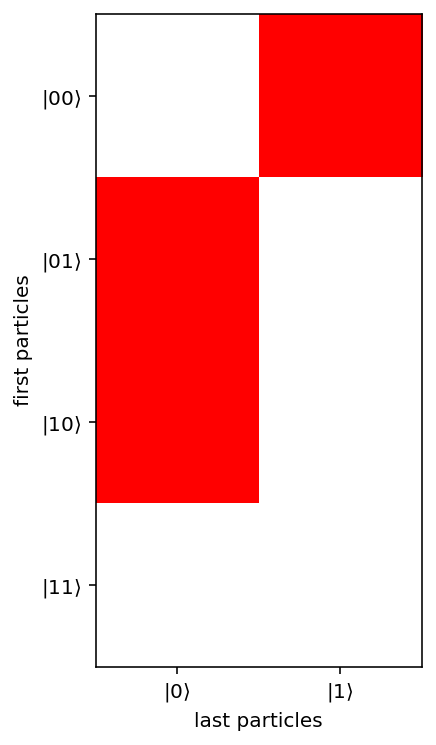

In [35]:

def generate_rand_ghz_ensemble(d,m):
    return [rand_dm(N=d) for i in range(m)]

# GHZ
ghz = ghz_state(N=3)

# W
w = w_state(N=3)
# bell_state(state='00')
# singlet_state()

# Schmidt decomposition
plot_schmidt(w, splitting=2, labels_iteration=(3, 2), theme='light', fig=None, ax=None, figsize=(6, 6))

##### mixed state

Werner state

In [377]:
# plot_expectation_values(results, ylabels=[], title=None, show_legend=False, fig=None, axes=None, figsize=(8, 4))

# plot_wigner_sphere(fig, ax, wigner, reflections)

#### Four-qubit case

graph state 

cluster state

## version of software package/module 

In [37]:
# about()
# from qutip.ipynbtools import version_table
# version_table()
# qutip.cite()

In [52]:
# conda list

In [333]:
import sklearn
print(sklearn.__version__)

1.1.2


In [29]:
# https://vprusso.github.io/toqito/
from toqito.nonlocal_games.xor_game import XORGame

# The probability matrix.
prob_mat = np.array([[1/4, 1/4], [1/4, 1/4]])

# The predicate matrix.
pred_mat = np.array([[0, 0], [0, 1]])

# Define CHSH game from matrices.
chsh = XORGame(prob_mat, pred_mat)
chsh.classical_value()
chsh.quantum_value()

0.8535533908447781